In [89]:
import pandas as pd 
import os 
import xlrd
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

### Concatenate 10 Datasets

In [90]:
# current work directory
path = os.getcwd()

# show all files
files = os.listdir(path)
files 

['.ipynb_checkpoints',
 'dataframe_albuquerque.xlsx',
 'dataframe_colorado.xlsx',
 'dataframe_indianapolis.xlsx',
 'dataframe_las_vegas.xlsx',
 'dataframe_miami.xlsx',
 'dataframe_new_york.xlsx',
 'dataframe_philadelphia.xlsx',
 'dataframe_san_diego.xlsx',
 'dataframe_san_francisco.xlsx',
 'dataframe_washington.xlsx',
 'Data_Analysis.ipynb',
 'Data_Cleaned.ipynb']

In [91]:
files_needed = ['dataframe_albuquerque.xlsx',
 'dataframe_colorado.xlsx',
 'dataframe_indianapolis.xlsx',
 'dataframe_las_vegas.xlsx',
 'dataframe_miami.xlsx',
 'dataframe_new_york.xlsx',
 'dataframe_philadelphia.xlsx',
 'dataframe_san_diego.xlsx',
 'dataframe_san_francisco.xlsx',
 'dataframe_washington.xlsx'
]

In [92]:
# initialize dataframe
df_combined = pd.DataFrame()

for f in files_needed:
    df_combined = pd.concat([df_combined, pd.read_excel(f, 'Sheet1')])

In [93]:
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
855,1715 Euclid St NW,6 Beds,NaN,NaN,1906,Open Parking,"$1,900,000",Washington
856,2015 Q St NW,6 Beds,NaN,"5,285 sqft",1925,2 Parking Spaces,"$2,750,000",Washington
857,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington
858,1099 22nd St NW #401,3 Beds,3 Baths,"2,078 sqft",1985,2 Car Garage,"$1,375,000",Washington


### Check for missing data

In [94]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8755 entries, 0 to 859
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     8755 non-null   object
 1   Bedrooms    8255 non-null   object
 2   Bathrooms   8145 non-null   object
 3   Area        8020 non-null   object
 4   Year Built  8333 non-null   object
 5   Parking     8068 non-null   object
 6   Price       8752 non-null   object
 7   Location    8755 non-null   object
dtypes: object(8)
memory usage: 615.6+ KB


In [95]:
# check for at least one missing value in row
df_combined[df_combined.isna().any(axis=1)]

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
370,Pajarito Mesa,NaN,NaN,NaN,NaN,NaN,"$13,000",Albuquerque
376,1033 Forrester Ave NW,Studio,NaN,600 sqft,1977,No Info,"$205,000",Albuquerque
400,1920 Broadway Blvd SE,2 Beds,1 Bath,NaN,1962,No Info,"$245,000",Albuquerque
402,1990 1/2 Cherokee Rd NW,NaN,NaN,NaN,NaN,NaN,"$175,000",Albuquerque
404,1301 Iron Ave SW,2 Beds,2 Baths,NaN,1916,No Info,"$355,000",Albuquerque
...,...,...,...,...,...,...,...,...
817,2308 Tracy Pl NW,6 Beds,6 Baths,NaN,1919,Garage,"$4,888,000",Washington
818,2017 Rear 2 St NE,NaN,NaN,NaN,NaN,NaN,"$295,000",Washington
855,1715 Euclid St NW,6 Beds,NaN,NaN,1906,Open Parking,"$1,900,000",Washington
856,2015 Q St NW,6 Beds,NaN,"5,285 sqft",1925,2 Parking Spaces,"$2,750,000",Washington


<Axes: >

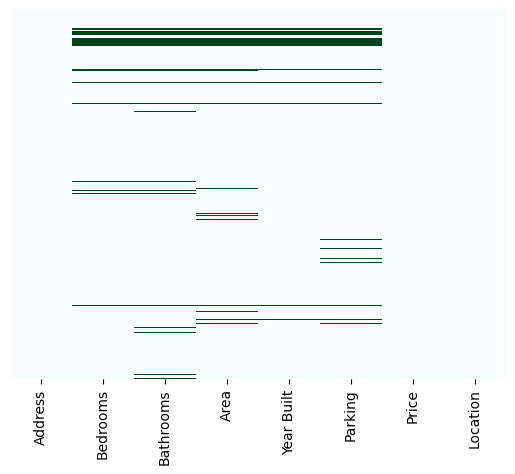

In [96]:
# check the missing values
sns.heatmap(df_combined.isna(), yticklabels=False, cbar=False, cmap='BuGn')

In [97]:
df_combined = df_combined.dropna()

In [98]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7643 entries, 0 to 858
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     7643 non-null   object
 1   Bedrooms    7643 non-null   object
 2   Bathrooms   7643 non-null   object
 3   Area        7643 non-null   object
 4   Year Built  7643 non-null   object
 5   Parking     7643 non-null   object
 6   Price       7643 non-null   object
 7   Location    7643 non-null   object
dtypes: object(8)
memory usage: 537.4+ KB


<Axes: >

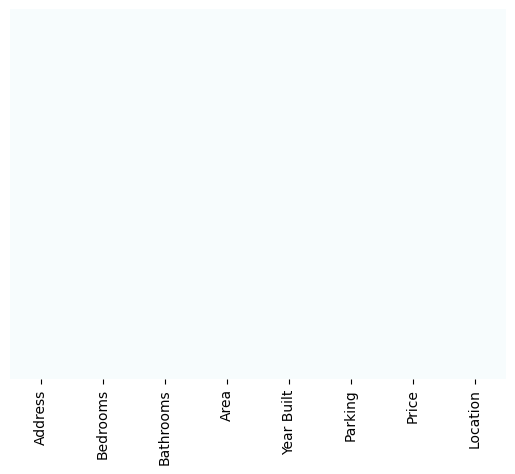

In [99]:
# check the missing values
sns.heatmap(df_combined.isna(), yticklabels=False, cbar=False, cmap='BuGn')

### Reset/Change index 

In [100]:
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
852,804 21st St NE #3,2 Beds,2 Baths,855 sqft,1939,No Info,"$414,900",Washington
853,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"$829,900",Washington
854,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"$549,900",Washington
857,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington


In [101]:
df_combined = df_combined.reset_index(drop=True)

In [102]:
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
7638,804 21st St NE #3,2 Beds,2 Baths,855 sqft,1939,No Info,"$414,900",Washington
7639,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"$829,900",Washington
7640,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"$549,900",Washington
7641,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington


### Check for outlers and doubles

In [103]:
# check for duplicates
df_combined.duplicated().sum()

1539

In [104]:
df_combined.loc[df_combined.duplicated(), :]

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
80,1829 Illinois St NE,5 Beds,2 Baths,"1,797 sqft",1954,1 Car Garage,"$225,000",Albuquerque
81,9109 Crestwood Ave NE,3 Beds,3 Baths,"2,183 sqft",1963,2 Car Garage,"$320,000",Albuquerque
82,3401 Cagua Dr NE,3 Beds,2 Baths,"1,831 sqft",1955,2 Carport Spaces,"$269,000",Albuquerque
83,1325 Hertz Dr SE,3 Beds,3 Baths,"3,335 sqft",1975,2 Car Garage,"$435,000",Albuquerque
84,1020 Indiana St SE,4 Beds,2 Baths,"1,950 sqft",1953,Garage,"$299,900",Albuquerque
...,...,...,...,...,...,...,...,...
7566,525 Water St SW #420,3 Beds,3 Baths,"1,724 sqft",2016,2 Car Garage,"$1,375,000",Washington
7567,1032 Lamont St NW #A,3 Beds,3 Baths,"1,464 sqft",1907,Open Parking,"$749,000",Washington
7568,2403 Savannah St SE,3 Beds,2 Baths,"1,405 sqft",1950,1 Open Spaces,"$449,900",Washington
7569,7508 Eastern Ave NW,3 Beds,3 Baths,"1,088 sqft",1948,Open Parking,"$599,000",Washington


In [105]:
df_combined = df_combined.drop_duplicates()
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
7638,804 21st St NE #3,2 Beds,2 Baths,855 sqft,1939,No Info,"$414,900",Washington
7639,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"$829,900",Washington
7640,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"$549,900",Washington
7641,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington


In [106]:
df_combined = df_combined.reset_index(drop=True)

In [107]:
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2 Beds,2 Baths,855 sqft,1939,No Info,"$414,900",Washington
6100,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"$829,900",Washington
6101,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"$549,900",Washington
6102,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington


### Change price coloumn

In [108]:
# rename price column and update existing dataframe
df_combined = df_combined.rename(columns={'Price':'Price($)'})
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2 Beds,2 Baths,855 sqft,1939,No Info,"$414,900",Washington
6100,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"$829,900",Washington
6101,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"$549,900",Washington
6102,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington


### Price Data : Remove dollar sign from price

In [109]:
df_combined['Price($)'] = df_combined['Price($)'].str.strip('$')

In [110]:
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"450,000",Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2 Beds,2 Baths,855 sqft,1939,No Info,"414,900",Washington
6100,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"829,900",Washington
6101,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"549,900",Washington
6102,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"319,500",Washington


### Price data: Cut ',' in area

In [111]:
df_combined['Price($)'] = df_combined['Price($)'].str.replace(',', '')

In [112]:
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2 Beds,2 Baths,855 sqft,1939,No Info,414900,Washington
6100,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,829900,Washington
6101,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,549900,Washington
6102,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,319500,Washington


### Change area coloumn

In [113]:
# rename price column and update existing dataframe
df_combined = df_combined.rename(columns={'Area':'Area(Sqft)'})
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2 Beds,2 Baths,855 sqft,1939,No Info,414900,Washington
6100,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,829900,Washington
6101,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,549900,Washington
6102,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,319500,Washington


### Area Data : Cut 'sqft' string element

In [114]:
df_combined['Area(Sqft)'] = df_combined['Area(Sqft)'].str.strip(' sqft')

In [115]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000",1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212",2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600",1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445",1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2 Beds,2 Baths,855,1939,No Info,414900,Washington
6100,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200",1933,Open Parking,829900,Washington
6101,1111 25th St NW #304,2 Beds,1 Bath,835,2005,1 Car Garage,549900,Washington
6102,922 24th St NW #5B,1 Bed,1 Bath,743,1962,1 Car Garage,319500,Washington


### Area Data : Cut ',' string element

In [116]:
df_combined['Area(Sqft)'] = df_combined['Area(Sqft)'].str.replace(',', '')

In [117]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,2000,1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,2212,2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,1600,1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,2445,1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2 Beds,2 Baths,855,1939,No Info,414900,Washington
6100,2232 Mount View Pl SE,3 Beds,4 Baths,1200,1933,Open Parking,829900,Washington
6101,1111 25th St NW #304,2 Beds,1 Bath,835,2005,1 Car Garage,549900,Washington
6102,922 24th St NW #5B,1 Bed,1 Bath,743,1962,1 Car Garage,319500,Washington


### Bedrooms Data : Cut 'Beds' string element

In [118]:
df_combined['Bedrooms'] = df_combined['Bedrooms'].str.strip(' Beds')

In [119]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3 Baths,2000,1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4,3 Baths,2212,2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1 Bath,815,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2 Baths,1600,1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4,3 Baths,2445,1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2,2 Baths,855,1939,No Info,414900,Washington
6100,2232 Mount View Pl SE,3,4 Baths,1200,1933,Open Parking,829900,Washington
6101,1111 25th St NW #304,2,1 Bath,835,2005,1 Car Garage,549900,Washington
6102,922 24th St NW #5B,1,1 Bath,743,1962,1 Car Garage,319500,Washington


In [120]:
df_combined['Bedrooms'].value_counts() 

Bedrooms
3         2085
2         1333
4         1297
5          521
1          443
6          210
7           74
Studio      73
8           37
9           17
11           5
12           3
10           2
13           1
84           1
14           1
24           1
Name: count, dtype: int64

###  Bedrooms Data: "Studio" = 1 room

In [121]:
df_combined['Bedrooms'] = df_combined['Bedrooms'].apply(lambda x: 1 if 'Studio' in x else x) 

In [122]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3 Baths,2000,1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4,3 Baths,2212,2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1 Bath,815,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2 Baths,1600,1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4,3 Baths,2445,1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2,2 Baths,855,1939,No Info,414900,Washington
6100,2232 Mount View Pl SE,3,4 Baths,1200,1933,Open Parking,829900,Washington
6101,1111 25th St NW #304,2,1 Bath,835,2005,1 Car Garage,549900,Washington
6102,922 24th St NW #5B,1,1 Bath,743,1962,1 Car Garage,319500,Washington


### Bathrooms Data : Cut 'Baths' string element

In [123]:
df_combined['Bathrooms'] = df_combined['Bathrooms'].str.strip(' Baths')

In [124]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3,2000,1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4,3,2212,2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1,815,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2,1600,1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4,3,2445,1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2,2,855,1939,No Info,414900,Washington
6100,2232 Mount View Pl SE,3,4,1200,1933,Open Parking,829900,Washington
6101,1111 25th St NW #304,2,1,835,2005,1 Car Garage,549900,Washington
6102,922 24th St NW #5B,1,1,743,1962,1 Car Garage,319500,Washington


### Parking Data : yes/no

In [125]:
df_combined['Parking'].value_counts()

Parking
Garage               1623
No Info              1136
2 Car Garage         1020
Open Parking          805
1 Car Garage          487
3 Car Garage          333
Attached Garage       158
1 Parking Spaces      134
4 Car Garage           80
1 Carport Spaces       69
1 Open Spaces          39
2 Open Spaces          37
2 Parking Spaces       35
2 Carport Spaces       28
Carport                23
0 Open Spaces          17
6 Car Garage           14
5 Car Garage           11
4 Parking Spaces        8
3 Open Spaces           6
5 Open Spaces           5
4 Open Spaces           5
3 Parking Spaces        4
8 Car Garage            4
8 Parking Spaces        3
3 Carport Spaces        3
9 Car Garage            2
6 Parking Spaces        2
5 Parking Spaces        1
206 Car Garage          1
54 Carport Spaces       1
9 Parking Spaces        1
20 Car Garage           1
4 Carport Spaces        1
3.5 Car Garage          1
7 Car Garage            1
10 Car Garage           1
11 Car Garage           1
0 Ca

In [126]:
df_combined['Parking'] = df_combined['Parking'].apply(lambda x: 'yes' if 'Garage' in x or 'Carport' in x or 'Car' in x or 'Open' in x 
                            else 'no')

In [127]:
df_combined['Parking'].value_counts()

Parking
yes    4780
no     1324
Name: count, dtype: int64

In [128]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3,2000,1975,yes,330000,Albuquerque
1,460 Wesley Ct SW,4,3,2212,2003,yes,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1,815,1948,no,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2,1600,1977,yes,269900,Albuquerque
4,2804 Charleston St NE,4,3,2445,1963,yes,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2,2,855,1939,no,414900,Washington
6100,2232 Mount View Pl SE,3,4,1200,1933,yes,829900,Washington
6101,1111 25th St NW #304,2,1,835,2005,yes,549900,Washington
6102,922 24th St NW #5B,1,1,743,1962,yes,319500,Washington


### Convert all numbers to integers 

#### Bedroom

In [129]:
# check if "bedrooms column" is a numeric element
is_numeric_dtype(df_combined['Bedrooms'])

False

In [130]:
# check if "bedrooms column" is a string element
is_string_dtype(df_combined['Bedrooms'])

False

In [131]:
df_combined['Bedrooms'] = df_combined['Bedrooms'].astype(int) 

#### Bathroom

In [132]:
# check if "bathrooms column" is a numeric element
is_numeric_dtype(df_combined['Bathrooms'])

False

In [133]:
# check if "bedrooms column" is a string element
is_string_dtype(df_combined['Bathrooms'])

True

In [134]:
df_combined['Bathrooms'] = df_combined['Bathrooms'].astype(int) 

### Area in sqft

In [135]:
# check if "area" is a numeric element
is_numeric_dtype(df_combined['Area(Sqft)'])

False

In [136]:
# check if "area" is a string element
is_string_dtype(df_combined['Area(Sqft)'])

True

In [137]:
df_combined['Area(Sqft)'] = df_combined['Area(Sqft)'].astype(int) 

#### Year built

In [138]:
# 1) check if numeric
# 10) 
is_numeric_dtype(df_combined['Year Built'])

False

In [147]:
# change to numeric
# 9)
df_combined['Year Built'] = df_combined['Year Built'].astype(int) 

In [140]:
# 3) show "no info"
df_combined[df_combined['Year Built'] == 'No Info']

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
10,2304 General Marshall St NE,3,2,1877,No Info,yes,304900,Albuquerque
24,6408 Los Pueblos Pl NW,3,3,1930,No Info,yes,250000,Albuquerque
25,2128 Altura Verde Ln NE,3,3,2060,No Info,yes,299900,Albuquerque
33,9720 Stone St NW,3,3,2378,No Info,yes,314900,Albuquerque
54,1705 Los Jardines Pl NW,2,2,864,No Info,yes,159000,Albuquerque
...,...,...,...,...,...,...,...,...
5415,875 California St #402,2,2,1444,No Info,yes,2320000,San Francisco
5430,960 Market St #304,1,1,344,No Info,no,520000,San Francisco
5432,821 Folsom St #310,1,1,717,No Info,no,779000,San Francisco
5456,72 Townsend St #707,1,2,851,No Info,yes,1250000,San Francisco


In [146]:
# 4) replace "no info" with 0
# 8)
df_combined['Year Built'] = df_combined['Year Built'].apply(lambda x: 0 if 'No Info' in x else x) 

In [142]:
# 5) save in str
df_combined['Year Built'] = df_combined['Year Built'].astype(str)

In [143]:
# 6) unique values
df_combined['Year Built'].value_counts()

Year Built
2021.0    306
2021      171
1925      145
1900      135
1920      132
         ... 
1893.0      1
1903        1
1752        1
1809        1
1874        1
Name: count, Length: 288, dtype: int64

In [144]:
# 7) 
df_combined['Year Built'] = df_combined['Year Built'].apply(lambda x: x.replace('.0','') if '.0' in x else x )

In [145]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3,2000,1975,yes,330000,Albuquerque
1,460 Wesley Ct SW,4,3,2212,2003,yes,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1,815,1948,no,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2,1600,1977,yes,269900,Albuquerque
4,2804 Charleston St NE,4,3,2445,1963,yes,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2,2,855,1939,no,414900,Washington
6100,2232 Mount View Pl SE,3,4,1200,1933,yes,829900,Washington
6101,1111 25th St NW #304,2,1,835,2005,yes,549900,Washington
6102,922 24th St NW #5B,1,1,743,1962,yes,319500,Washington


#### Price in $

In [148]:
is_numeric_dtype(df_combined['Price($)'])

False

In [149]:
df_combined['Price($)'] = df_combined['Price($)'].str.replace('[^\d]', '', regex=True).astype(int)


In [150]:
df_combined['Price($)'] = df_combined['Price($)'].apply(lambda x: str(x).replace('+', '') if isinstance(x, str) and '+' in str(x) else x)


In [151]:
df_combined['Price($)'] = df_combined['Price($)'].astype(int) 

In [152]:
is_numeric_dtype(df_combined['Price($)'])

True

In [153]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3,2000,1975,yes,330000,Albuquerque
1,460 Wesley Ct SW,4,3,2212,2003,yes,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1,815,1948,no,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2,1600,1977,yes,269900,Albuquerque
4,2804 Charleston St NE,4,3,2445,1963,yes,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2,2,855,1939,no,414900,Washington
6100,2232 Mount View Pl SE,3,4,1200,1933,yes,829900,Washington
6101,1111 25th St NW #304,2,1,835,2005,yes,549900,Washington
6102,922 24th St NW #5B,1,1,743,1962,yes,319500,Washington


### New Column 'price/sqft'

In [154]:
df_combined['Area(Sqft)'] = pd.to_numeric(df_combined['Area(Sqft)'], errors='coerce')
df_combined['Price/Sqft'] = df_combined['Price($)'] / df_combined['Area(Sqft)']

In [155]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location,Price/Sqft
0,9400 La Playa St NE,4,3,2000,1975,yes,330000,Albuquerque,165.000000
1,460 Wesley Ct SW,4,3,2212,2003,yes,289900,Albuquerque,131.057866
2,1307 Bernardino Rd NW,2,1,815,1948,no,155000,Albuquerque,190.184049
3,5215 Cimarron Rd NW,3,2,1600,1977,yes,269900,Albuquerque,168.687500
4,2804 Charleston St NE,4,3,2445,1963,yes,450000,Albuquerque,184.049080
...,...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2,2,855,1939,no,414900,Washington,485.263158
6100,2232 Mount View Pl SE,3,4,1200,1933,yes,829900,Washington,691.583333
6101,1111 25th St NW #304,2,1,835,2005,yes,549900,Washington,658.562874
6102,922 24th St NW #5B,1,1,743,1962,yes,319500,Washington,430.013459


In [156]:
df_combined['Price/Sqft'] = df_combined['Price($)'] / df_combined['Area(Sqft)']
df_combined['Price/Sqft'] = df_combined['Price/Sqft'].round(2)

In [157]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location,Price/Sqft
0,9400 La Playa St NE,4,3,2000,1975,yes,330000,Albuquerque,165.00
1,460 Wesley Ct SW,4,3,2212,2003,yes,289900,Albuquerque,131.06
2,1307 Bernardino Rd NW,2,1,815,1948,no,155000,Albuquerque,190.18
3,5215 Cimarron Rd NW,3,2,1600,1977,yes,269900,Albuquerque,168.69
4,2804 Charleston St NE,4,3,2445,1963,yes,450000,Albuquerque,184.05
...,...,...,...,...,...,...,...,...,...
6099,804 21st St NE #3,2,2,855,1939,no,414900,Washington,485.26
6100,2232 Mount View Pl SE,3,4,1200,1933,yes,829900,Washington,691.58
6101,1111 25th St NW #304,2,1,835,2005,yes,549900,Washington,658.56
6102,922 24th St NW #5B,1,1,743,1962,yes,319500,Washington,430.01


### Check for Outliers

In [158]:
df_combined['Price/Sqft'].describe() 

count      6104.000000
mean        619.759395
std        7288.529228
min           0.440000
25%         189.162500
50%         308.520000
75%         597.365000
max      560000.000000
Name: Price/Sqft, dtype: float64

In [159]:
df_combined.loc[df_combined['Price/Sqft'] == 560000]

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location,Price/Sqft
3544,3069 Heath Ave,3,2,1,1899,no,560000,New York,560000.0


In [160]:
df_combined = df_combined.drop(3564)

### Save in Excel

In [161]:
df_combined.to_excel('cleaned_data.xlsx', index=False)